<a href="https://colab.research.google.com/github/KM-Rob/PBL_UWB/blob/main/UWB_test_MLPRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
# my drive mount with datafile
from google.colab import drive
drive.mount('/content/drive')
# '/content/drive/MyDrive/ColabFolder/PBL_UWB/table.csv'
'''

Mounted at /content/drive


# import bibliotek matematycznych i AI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import joblib

# import danych z git

In [ ]:
!git clone https://github.com/KM-Rob/PBL_UWB.git

In [ ]:
df = pd.read_csv('/content/PBL_UWB/simulation_results/table.csv',sep=';', decimal=',')
df['z_we']=0
df["Z_wy"]=0
df.head()

,d1,d2,d3,x_we,y_we,X_wy,Y_wy,z_we,Z_wy
0,4.336474,7.725822,6.693221,-3.2,-3.0,-3.185032,-2.917931,0,0
1,4.149860,7.741165,6.574950,-3.2,-2.8,-3.205937,-2.672134,0,0
2,4.075240,7.684606,6.403378,-3.2,-2.6,-3.245004,-2.486217,0,0
3,3.921239,7.553250,6.212391,-3.2,-2.4,-3.172344,-2.319115,0,0
4,3.767211,7.480597,6.085136,-3.2,-2.2,-3.115693,-2.156003,0,0


In [ ]:
X = df[['d1','d2','d3']].copy()
y = df[['x_we','y_we']].copy()

In [ ]:
y.head()

,x_we,y_we
0,-3.2,-3.0
1,-3.2,-2.8
2,-3.2,-2.6
3,-3.2,-2.4
4,-3.2,-2.2


In [ ]:
# podział na zbiór uczący i testowy+walidacyjny z podziałem 60% na 40%
(x_train,x_test,y_train,y_test)=tts(X,y,test_size=0.3)
# podział zbioru testowy+walidacyjny na zbiór testowy i walidacyjny po 50%
(x_test,x_val,y_test,y_val)=tts(x_test,y_test,test_size=0.5)

print("zbior uczacy: {}".format(len(x_train)))
print("zbior walidacyjny: {}".format(len(x_val)))
print("zbior testowy: {}".format(len(x_test)))

zbior uczacy: 761
zbior walidacyjny: 164
zbior testowy: 163


In [ ]:
scaler_X = StandardScaler()
x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.transform(x_test)
x_val = scaler_X.transform(x_val)

In [ ]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)
y_val = scaler_y.transform(y_val)

In [ ]:
neurons_list = [3, 5, 10, 20, 30]
print("Liczba neuronów | MSE")
print("----------------------")

Liczba neuronów | MSE
----------------------


In [ ]:
results: float = []
for neurons in neurons_list:
    model = MLPRegressor(hidden_layer_sizes=(neurons,), max_iter=2000, random_state=42)
    filename = f"model_{neurons}"
    history = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    joblib.dump(model, filename+".sav")
    print(f"{neurons:<5} {mse:.6f}")
    results.append([neurons, mse])

3     0.048347
5     0.024780
10    0.028607
20    0.008730
30    0.006704


In [ ]:
hmse = 1
for neurons, mse in results:
  if mse< hmse:
    hmse=mse
    best_neurons = neurons
hmse = 1
for neurons, mse in results:
  if mse < hmse:
    hmse = mse
    best_neurons = neurons

print(f"best mse: {hmse} for neurons {best_neurons}")

filename = f"model_{best_neurons}"+".sav"
best_model = joblib.load(filename)

best mse: 0.00670396474185835 for neurons 30


In [ ]:
y_pred  = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.00670396474185835

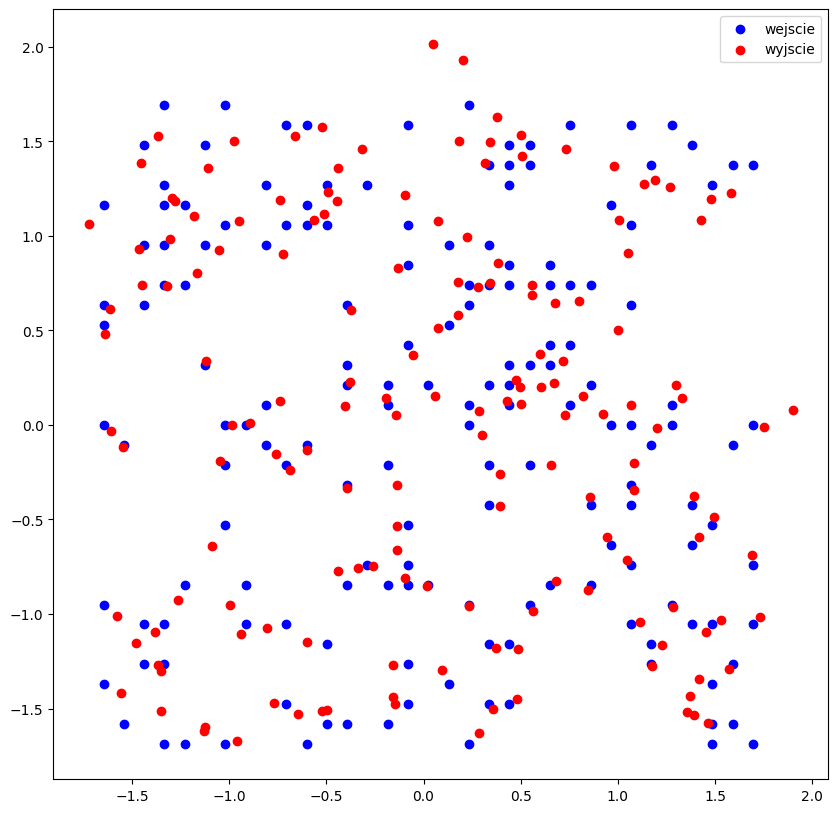

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test[:,0],y_test[:,1],c='b',label='wejscie')
plt.scatter(y_pred[:,0],y_pred[:,1],c='r',label='wyjscie')
plt.legend()
plt.show()

In [ ]:
final = pd.DataFrame()
final['x_we'] = y_test[:,0]
final['y_we'] = y_test[:,1]
final['x_pred'] = y_pred[:,0]
final['y_pred'] = y_pred[:,1]
final.head()

,x_we,y_we,x_pred,y_pred
0,-1.646459,0.528550,-1.640366,0.481150
1,-1.437633,-1.266634,-1.368898,-1.267379
2,0.441800,1.478942,0.376247,1.630735
3,0.441800,1.373343,0.342744,1.497236
4,-1.333220,1.690140,-1.364319,1.527088


Zbiór zawiera 163 danych


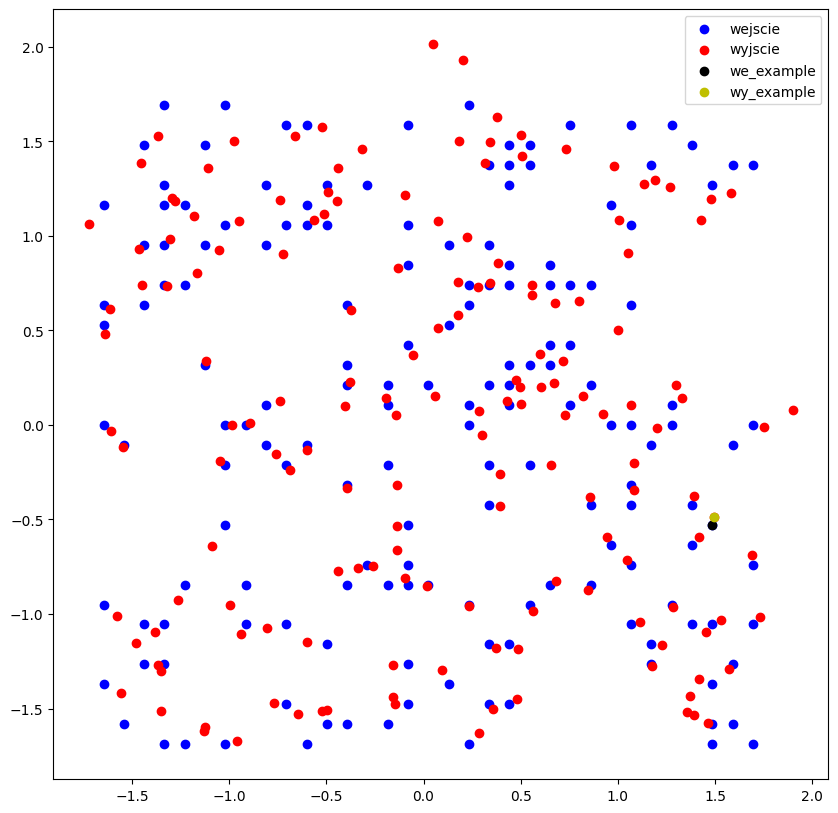

In [ ]:
print(f"Zbiór zawiera {len(final)} danych")
example = 35
plt.figure(figsize=(10,10))
plt.scatter(final['x_we'],final['y_we'],c='b',label='wejscie')
plt.scatter(final['x_pred'],final['y_pred'],c='r',label='wyjscie')

plt.scatter(final['x_we'].iloc[example],final['y_we'].iloc[example],c='k', label='we_example')
plt.scatter(final['x_pred'].iloc[example],final['y_pred'].iloc[example],c='y', label='wy_example')

plt.legend()
plt.show()